### Lecture-01 Monte Carlo Methods

#### 典型的赌博问题开始讲起
> 
Given some cards. 2, 3, 4, 5, 6, 7, 8, 9, 10 J, Q, K, [红, 黑, 方, 梅]
> 
What's the probability of: 清一色、同花顺、顺子（拖拉机）
> 清一色(三张颜色一样）和顺子（顺序链接），哪个牌应该获胜？ 

+ 问题？哪个大？ 
+ 如果要押注：三个区域：清一色，顺子，和什么都不是；同样扔了10块钱，如果押中了，那么赔率的比例应该是怎么样的？ 
    + 概率越低的赔率越高，假设A事件出现的概率是B事件的一半，则A事件押中的获得的钱应为B事件的2倍；
    + 假设押中了“什么都不是”，则中奖2元
    + 则，押中清一色，顺子应该奖励多少钱？ 如果不按照这个比例，会怎么样？ 


In [1]:
from itertools import product

In [2]:
numbers = '23456789TJQKA'
colors = '红黑方梅'
joker = 'Jj'

def numbers_value(n): 
    position_value = numbers.find(n) + 2
    
    if n == 'A': 
        return position_value, 1
#     if n == 'J' or 'j':
#         return tuple(range(1, 14))
    else:
        return position_value, 

In [3]:
numbers_value('A')

(14, 1)

In [4]:
one_suite_cards = [
    c+n for c, n in product(numbers, colors)
]

In [5]:
one_suite_cards

['2红',
 '2黑',
 '2方',
 '2梅',
 '3红',
 '3黑',
 '3方',
 '3梅',
 '4红',
 '4黑',
 '4方',
 '4梅',
 '5红',
 '5黑',
 '5方',
 '5梅',
 '6红',
 '6黑',
 '6方',
 '6梅',
 '7红',
 '7黑',
 '7方',
 '7梅',
 '8红',
 '8黑',
 '8方',
 '8梅',
 '9红',
 '9黑',
 '9方',
 '9梅',
 'T红',
 'T黑',
 'T方',
 'T梅',
 'J红',
 'J黑',
 'J方',
 'J梅',
 'Q红',
 'Q黑',
 'Q方',
 'Q梅',
 'K红',
 'K黑',
 'K方',
 'K梅',
 'A红',
 'A黑',
 'A方',
 'A梅']

In [6]:
len(one_suite_cards)

52

In [7]:
import random

In [8]:
random.shuffle(one_suite_cards)

In [9]:
people = 3
card_num = 3

one_suite_cards = [
    c+n for c, n in product(numbers, colors)
]

random_hand = [one_suite_cards[i:i+3] for i in range(0, people * card_num, card_num)]

In [10]:
random_hand

[['2红', '2黑', '2方'], ['2梅', '3红', '3黑'], ['3方', '3梅', '4红']]

In [11]:
set(list(numbers_value('T')))

{10}

In [29]:
def distribute_hand(people_n, with_joker=False):
#    people = 3
    card_n = 3
    
    one_suite_cards = [
        c+n for c, n in product(numbers, colors)
    ]
    
    random.shuffle(one_suite_cards)
    #print(type(people_n))
    random_hand = [one_suite_cards[i:i+3] for i in range(0, people * card_num, card_num)]

    return random_hand

def is_flush(hand):
    return len(set(c for _, c in hand)) == 1

def ascend(numbers): 
    sorted_n = sorted(numbers)
    return sorted_n[2] - sorted_n[1] == sorted_n[1] - sorted_n[0] == 1
    
def is_straight(hand):
    # if some cards could be anything
    possible_numbers = [numbers_value(n) for n, _ in hand]
    
    all_combinations = list(product(*possible_numbers))
   # print(all_combinations)

    if any(ascend(h) for h in all_combinations): return True
    else:
        return False

In [30]:
numbers_value('K')

(13,)

In [31]:
test_case = 'A梅 Q黑 K方'.split()

In [32]:
random_hand[2]

['3方', '3梅', '4红']

In [33]:
is_flush(['2黑', '8黑', 'T黑'])

True

In [34]:
is_straight(test_case)

True

In [35]:
from collections import Counter

In [36]:
for hand in distribute_hand(3):
    print(hand)

['8梅', '7红', '6梅']
['9红', '2方', 'K方']
['3方', '6方', 'K红']


In [37]:
from tqdm import tqdm_notebook

In [38]:
FLUSH, STRAIGHT = 'flush', 'straight'
    
def get_poker_times(p, r=10000):
    round_t = r
    people_n = p

    poker_counter = Counter()

    total_hand = 0

    for i in tqdm_notebook(range(round_t)):
        for hand in distribute_hand(people_n):
            total_hand += 1
            if is_flush(hand):
                poker_counter[FLUSH] += 1
            elif is_straight(hand): 
                poker_counter[STRAIGHT] += 1

    return poker_counter

In [39]:
from collections import defaultdict

In [40]:
people_numbers = range(2, 17)
r = 100000
rates = defaultdict(dict)

In [41]:
for n in tqdm_notebook(people_numbers):
    print(f'people number is: {n}')
    result = get_poker_times(n, r)
    rates[n][FLUSH], rates[n][STRAIGHT] = result[FLUSH], result[STRAIGHT]

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|          | 0/15 [00:00<?, ?it/s]

people number is: 2


/Users/gaominquan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/100000 [00:00<?, ?it/s]

people number is: 3


  0%|          | 0/100000 [00:00<?, ?it/s]

people number is: 4


  0%|          | 0/100000 [00:00<?, ?it/s]

people number is: 5


  0%|          | 0/100000 [00:00<?, ?it/s]

people number is: 6


  0%|          | 0/100000 [00:00<?, ?it/s]

people number is: 7


  0%|          | 0/100000 [00:00<?, ?it/s]

people number is: 8


  0%|          | 0/100000 [00:00<?, ?it/s]

people number is: 9


  0%|          | 0/100000 [00:00<?, ?it/s]

people number is: 10


  0%|          | 0/100000 [00:00<?, ?it/s]

people number is: 11


  0%|          | 0/100000 [00:00<?, ?it/s]

people number is: 12


  0%|          | 0/100000 [00:00<?, ?it/s]

people number is: 13


  0%|          | 0/100000 [00:00<?, ?it/s]

people number is: 14


  0%|          | 0/100000 [00:00<?, ?it/s]

people number is: 15


  0%|          | 0/100000 [00:00<?, ?it/s]

people number is: 16


  0%|          | 0/100000 [00:00<?, ?it/s]

In [42]:
rates

defaultdict(dict,
            {2: {'flush': 15591, 'straight': 9722},
             3: {'flush': 15559, 'straight': 9727},
             4: {'flush': 15594, 'straight': 9835},
             5: {'flush': 15601, 'straight': 9696},
             6: {'flush': 15233, 'straight': 9788},
             7: {'flush': 15578, 'straight': 9880},
             8: {'flush': 15311, 'straight': 9652},
             9: {'flush': 15570, 'straight': 9986},
             10: {'flush': 15550, 'straight': 9886},
             11: {'flush': 15680, 'straight': 9650},
             12: {'flush': 15671, 'straight': 9687},
             13: {'flush': 15668, 'straight': 9726},
             14: {'flush': 15684, 'straight': 9977},
             15: {'flush': 15668, 'straight': 9867},
             16: {'flush': 15647, 'straight': 9767}})

In [43]:
rates[3]

{'flush': 15559, 'straight': 9727}

In [44]:
import matplotlib.pyplot as plt

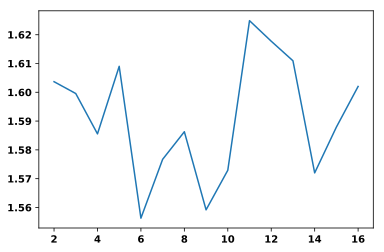

In [45]:
plt.plot(people_numbers, [rates[n][FLUSH]/rates[n][STRAIGHT] for n in people_numbers])

In [62]:
(5 *r - rates[5][FLUSH] - rates[5][STRAIGHT]) / (5 * r)

0.932356

In [63]:
rates[5][FLUSH]  / (5 * r)

0.041754

In [64]:
rates[5][STRAIGHT]  / (5 * r)

0.02589

In [65]:
0.915552 / 0.052046

17.59120777773508

In [66]:
0.915552 / 0.032402

28.256033578174186

#### 押注10块钱到，押中什么都没有，10元，则押中FLUSH应该为170，押中STRAIGHT应该为280；

## 趣味思考：如果FLUSH为 15  STRAIGHT为 60； 会对受益产生什么影响？ NAN为10元，FLUSH为 20， STRAIGHT为 40，会对受益产生什么影响？

## 数学期望：

In [261]:
0.052 * 30 + 0.032 * 50 + 0.915 * 2

4.99

In [264]:
0.052 * 15 + 0.032 * 60 + 0.915 * 2

4.529999999999999

In [265]:
0.052 * 20 + 0.032 * 40 + 0.915 * 10

11.47

## 蒙特卡洛方法，为什么叫蒙特卡洛方法呢？ 

+ 环境 environment
+ 观察 observation
+ 状态： States
+ Rewards：Money or success / failed (0/1)

## HOME-WORK-Part-1: 

+ 重构整理课程代码，将这些内容整理为一个.py文件；
+ 1. 增加大小王，大小王能够代替任何扑克牌；
+ 2. 将一手牌的个数变为5个，不包含大小王，在人数为10人的情况下，请分别求出以下扑克牌的概率： 
    + straight_flush: 五張同花色的連續數字牌
    + Four of a kind: 其中四張是相同數字的撲克牌
    + Full house(葫蘆): 由三張相同數字及任何两张其他相同數字的撲克牌组成 (AAA+BB)
    + Flush: 此牌由五张不按顺序但相同花色的扑克牌组成
    + Straight: 此牌由五张連續數字扑克牌组成
    + Three of a kind: 三条
    + Two pair: 两对, 两对數字相同但两两不同的扑克和一张雜牌组成，共五張牌。
    + Pair: 对子, 由两张相同數字的扑克牌和另三张無法組成牌型的雜牌组成。
+ 3. 在以上的概率求解中，有一个隐藏的“bug”，导致概率就算会有一些“轻微”的错误，请问个错误是什么？ 请修正它。
+ 4. 请思考蒙特卡洛方法求解问题和基于组合数学、概率率等方法的区别是什么？在计算机环境下使用有什么优势？ 

## 21点游戏

https://www.wikiwand.com/zh-hans/%E4%BA%8C%E5%8D%81%E4%B8%80%E9%BB%9E

二十一点的前身是在1700年左右起源于法国赌场的“vingt-et-un”（法文中21之意），当时的游戏对于两张牌的二十一点并未提供三比二的赔付分红。

起初二十一点在美国并不流行，因此赌场试著提供各种额外的奖金吸引赌客参与牌局。其中之一的额外奖金是当玩者手中同时拥有黑桃A和黑色的J（黑桃J或梅花J都可）时，奖金将会变成十倍。这样的牌称为“black jack”（黑杰克，二十一点），而这个名字就渐渐成为美国版二十一点游戏的名称，即使后来这项额外奖金规则停止，“black jack”名称还是继续存在。规则发展至今日，“blackjack”已经不一定需要包含J或黑色的牌了。



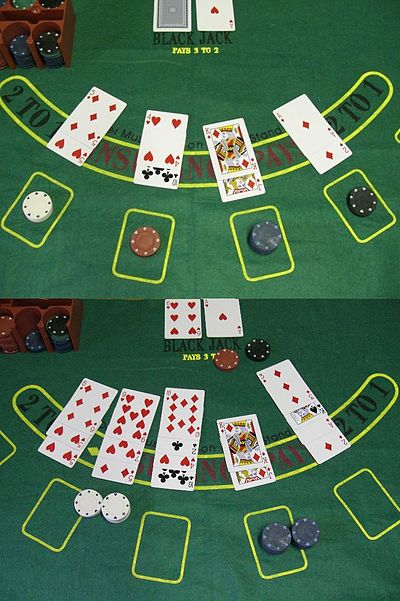

拥有最高点数的玩家获胜，其点数必须等于或低于21点；超过21点的玩家称为爆牌（Bust）。2点至10点的牌以牌面的点数计算，J、Q、K 每张为10点。A可记为1点或11点，若玩家会因A而爆牌则A可算为1点。

https://gymnasium.farama.org/environments/toy_text/blackjack/

### 'A'在什么时候是11，什么时候是1？ 
> 回答：A的默认值是11, 除非按照11会bust（爆牌），此时，当下的'A'按照1处理。

> 例如：

> A, A = 12, 11 + 1

> 2, A = 13 

> 10, A = 21

> 9, A, A = 21 ( 9 + 11 + 1)

## 问题： 对于初始化的2张牌，请问在以上规则下，这两张牌的最小值是多少？最大值是多少？ 

### step-1 make-env

## Terminology Analysis: 
    + Environment
    + Obvervation
    + State
    + Actions
    + Rewards
    + Done or not

In [2]:
%matplotlib inline

In [3]:
import gymnasium as gym
env = gym.make('Blackjack-v1', natural=False, sab=False, render_mode='rgb_array')

In [4]:
env.reset()

((20, 3, False), {})

In [6]:
import matplotlib.pyplot as plt

In [12]:
import time

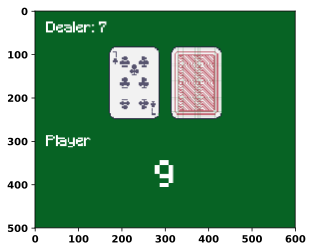

In [27]:
myobj = plt.imshow(env.render())

for i in range(10):
    myobj.set_data(env.render())
#    plt.imshow(env.render())
    env.reset()
   # plt.title(f"test : {i}") 
    plt.show()
    time.sleep(0.1)

In [35]:
%matplotlib notebook

<IPython.core.display.Javascript object>


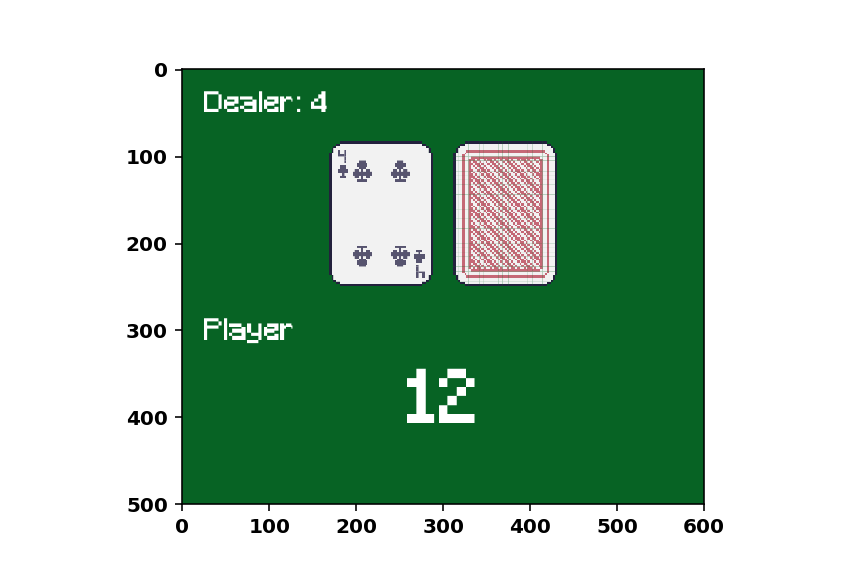

In [37]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

fig = plt.figure()
data = env.render()
im = plt.imshow(data, cmap='gist_gray_r', vmin=0, vmax=1)

def init():
    im.set_data(env.render())

def animate(i):
    env.reset()
    im.set_data(env.render())
    time.sleep(0.1)
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=500,
                               interval=50)

In [38]:
env.reset()

((12, 10, False), {})

<IPython.core.display.Javascript object>


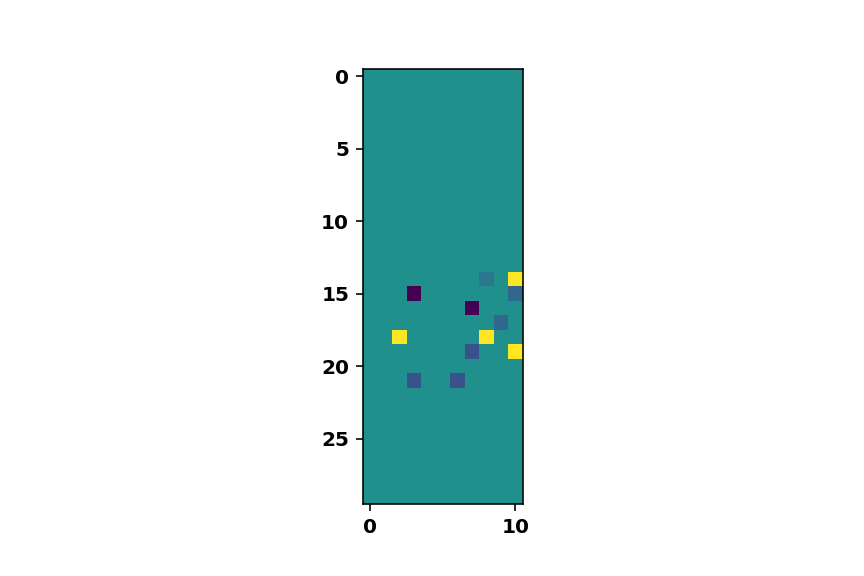

In [39]:
plt.imshow(env.render())

In [44]:
import pygame

(5, 0)

In [59]:
frames = []

for _ in range(10):
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)
    frames.append(env.render())
    if terminated or truncated:
        observation, info = env.reset()

env.close()

<IPython.core.display.Javascript object>


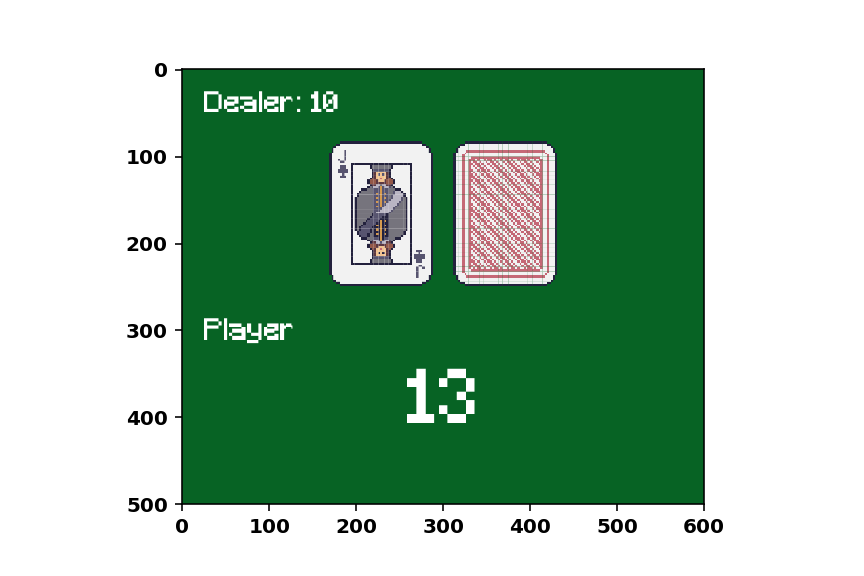

In [61]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

pygame.init() 

fig = plt.figure()
data = env.render()
im = plt.imshow(data, cmap='gist_gray_r', vmin=0, vmax=1)

def init():
    im.set_data(env.render())

def animate(i):
    env.reset()
    im.set_data(frames[i])
    time.sleep(0.2)
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(frames),
                               interval=50)

## How to make it intelligent? 

## Could know which state is better. $Value(s)$

In [63]:
from tqdm import tqdm_notebook

In [491]:
#episode = 100
episode = 500000 # try this second time
trajectories = []

state, info = env.reset() 

win_or_loss = []

for _ in tqdm_notebook(range(episode)):
    trajectory = []
    while True:
        action = env.action_space.sample()  # agent policy that uses the observation and info
        next_state, reward, terminated, truncated, info = env.step(action)
        #print(state, action, reward) # close this if episode is too huge
        trajectory.append( (state, action, reward) )
        
       # frames.append(env.render())
        if terminated or truncated:
            state, info = env.reset()
            
            win_or_loss.append(True if reward > 0 else False)

            trajectories.append(trajectory)
            
            break

env.close()

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


  0%|          | 0/500000 [00:00<?, ?it/s]

In [492]:
sum(int(w) for w in win_or_loss) / len(win_or_loss)

0.280852

In [493]:
max(trajectories, key=len)

[((12, 10, True), 1, 0.0),
 ((12, 10, True), 1, 0.0),
 ((12, 10, True), 1, 0.0),
 ((12, 10, True), 1, 0.0),
 ((12, 10, True), 1, 0.0),
 ((12, 10, True), 1, 0.0),
 ((12, 10, True), 0, 1.0)]

## Get State-Value

In [433]:
from collections import defaultdict

In [434]:
import numpy as np

In [435]:
trajectories[0]

[((16, 6, False), 1, 0.0), ((16, 6, False), 1, 0.0), ((16, 6, False), 0, 1.0)]

In [436]:
state_value = defaultdict(list)

for t in trajectories:
#    for s, a, r in t[::-1]:
    G = 0 # goal  / value
    visited = set()
    _gamma = 0.9
    for i, (s, a, r) in enumerate(t[::-1]):  # why do this? 
        G = _gamma * G + r
        if s not in visited:
            state_value[s].append(G)
            visited.add(s)

for s, g in state_value.items():
    state_value[s] = np.mean(g)

In [439]:
state_value

defaultdict(list,
            {(16, 6, False): -0.43825180433039296,
             (19, 3, False): -0.2504136789851076,
             (12, 10, False): -0.6116958197450341,
             (19, 8, False): -0.13070077864293658,
             (13, 8, False): -0.5870599429115129,
             (15, 4, False): -0.47006322052807736,
             (20, 10, False): -0.2399344888767572,
             (16, 10, False): -0.6693239152371342,
             (17, 10, False): -0.6182276815091029,
             (13, 10, False): -0.6409269442262372,
             (17, 5, False): -0.4280138768430182,
             (14, 3, True): -0.21691973969631237,
             (17, 9, False): -0.5610939567710631,
             (11, 10, False): -0.4693066593587284,
             (21, 2, True): 0.274585635359116,
             (16, 5, False): -0.4146243471273604,
             (14, 6, False): -0.354696507290607,
             (12, 9, False): -0.5904895104895105,
             (16, 8, False): -0.5959394904458599,
             (7, 10, False)

## Let's analysis what's the meaning of this "state-value" 

In [440]:
max(state_value.items(), key=lambda x_y: x_y[1])

((21, 6, True), 0.33553719008264465)

In [441]:
state_table_with_ace = np.zeros((30, 11))
state_table_without_ace = np.zeros((30, 11))
state_table_with_ace[:] = np.nan
state_table_without_ace[:] = np.nan

In [442]:
for (player, dealer_show, ace), value in state_value.items(): 
    if ace: 
        state_table_with_ace[player][dealer_show] = value
    else:
        state_table_without_ace[player][dealer_show] = value

In [443]:
%matplotlib inline

Text(0, 0.5, 'Current Player Sum')

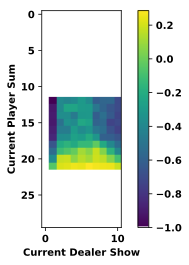

In [444]:
plt.imshow(state_table_with_ace)
plt.colorbar(s_value)
plt.xlabel('Current Dealer Show')
plt.ylabel('Current Player Sum')

Text(0, 0.5, 'Current Player Sum')

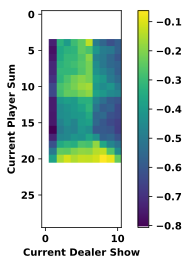

In [445]:
s_value = plt.imshow(state_table_without_ace)
plt.colorbar(s_value)
plt.xlabel('Current Dealer Show')
plt.ylabel('Current Player Sum')

In [446]:
from mpl_toolkits.mplot3d import Axes3D

In [447]:
import matplotlib as mpl

In [448]:
X, Y = np.meshgrid(np.arange(state_table_without_ace.shape[0]), 
                   np.arange(state_table_without_ace.shape[1]))

In [449]:
state_table_without_ace.shape

(30, 11)

In [450]:
def get_z(x, y, ace):
    data_source = state_table_with_ace if ace else state_table_without_ace
    return state_table_without_ace[x][y]

In [451]:
state_table_with_ace.shape

(30, 11)

In [452]:
#Y = Y[2:]

In [453]:
#X = X[:, 4:21]
Z = np.array([get_z(x,y,ace=False) for x,y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

In [462]:
dir(ax)

['M',
 '_3d_extend_contour',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autoscaleZon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis3don',
 '_axisbelow',
 '_button_press',
 '_button_release',
 '_cachedRenderer',
 '_cids',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_determine_lims',
 '_draw_grid',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_generate_normals',
 '_get_axis_list',
 '_get_lines',
 '_get_patches_f

<IPython.core.display.Javascript object>


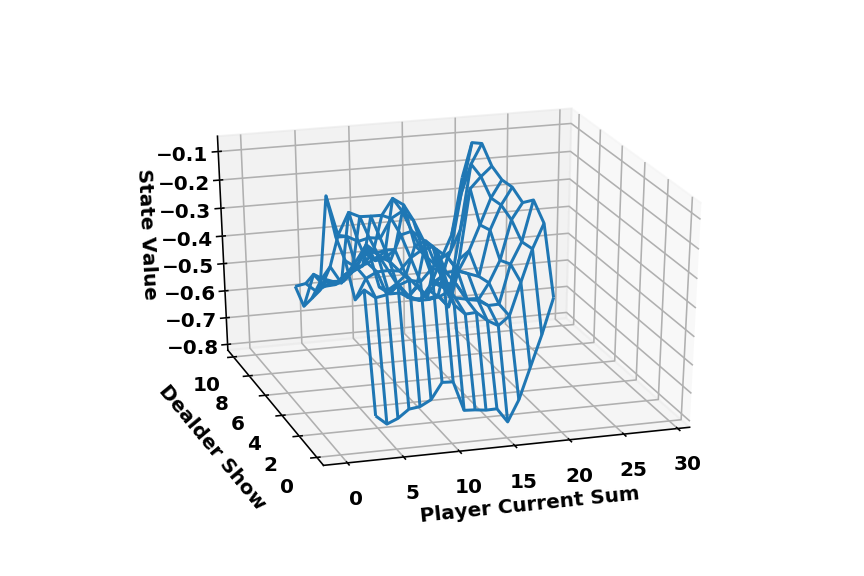

In [468]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

#ax.scatter(X,Y,Z) 
#ax.plot_surface(X, Y, Z)
ax.plot_wireframe(X, Y, Z)

ax.set_xlabel("Player Current Sum")
ax.set_ylabel("Dealder Show")
ax.set_zlabel("State Value")

plt.show()

## Action-Value: Monte-Carlo Control 

## => Change State-Value to (State, Action) - Value
## Just get the $argmax_a(State, Action)$
## The value of the action in a Given State, We call it **Q** Value. (Quality)

In [469]:
import numpy as np

In [471]:
np.argmax([0.1, -0.2])

0

In [475]:
import random

In [482]:
help(np.random.choice)

Help on built-in function choice:

choice(...) method of numpy.random.mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
    .. versionadded:: 1.7.0
    
    .. note::
        New code should use the ``choice`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if it were ``np.arange(a)``
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement. Default is True,
        meaning that a value of ``a`` can be selected mu

In [512]:
return_state_action = defaultdict(list)
q_table = defaultdict(lambda : [0, 0])  
# q_table or state_action_value['s1'] = [0.1, -0.2] # for action 0, and action 1

def policy(state): 
    # based on the state, give the action
    return np.argmax(q_table[state])

#for t in tqdm_notebook(np.random.choice(trajectories, size=50000)):
for t in tqdm_notebook(trajectories):
#    for s, a, r in t[::-1]:
    G = 0 # goal  / value
    visited = set()
    _gamma = 0.9
    for i, (s, a, r) in enumerate(t[::-1]):  # why do this? 
        G = _gamma * G + r
        if s not in visited:
            return_state_action[(s, a)].append(G)
            q_table[s][a] = np.mean(return_state_action[(s, a)])            

            visited.add(s)

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


  0%|          | 0/500000 [00:00<?, ?it/s]

In [486]:
q_table

defaultdict(<function __main__.<lambda>()>,
            {(18, 4, False): [0.18518518518518517, -1.0],
             (21, 2, True): [0.75, -1.0],
             (10, 9, False): [-0.3055555555555556, -1.0],
             (14, 10, True): [-0.4, -1.0],
             (11, 7, False): [-0.15384615384615385, -1.0],
             (21, 3, True): [0.6153846153846154, -1.0],
             (14, 7, True): [-0.375, -1.0],
             (21, 1, True): [0.4230769230769231, -1.0],
             (12, 10, False): [-0.5208333333333334, -1.0],
             (15, 7, False): [-0.34375, -1.0],
             (20, 10, False): [0.4906832298136646, -1.0],
             (14, 10, False): [-0.45806451612903226, -1.0],
             (12, 5, False): [-0.2857142857142857, -1.0],
             (18, 6, False): [0.37037037037037035, -1.0],
             (20, 2, False): [0.6829268292682927, -1.0],
             (13, 8, False): [-0.25, -1.0],
             (16, 9, True): [-0.42857142857142855, -1.0],
             (21, 10, True): [0.607476635

In [496]:
episode = 500000 # try this second time
trajectories = []

state, info = env.reset() 

win_or_loss = []

for _ in tqdm_notebook(range(episode)):
    trajectory = []
    while True:
        #action = env.action_space.sample()  # agent policy that uses the observation and info
        action = policy(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        #print(state, action, reward) # close this if episode is too huge
        trajectory.append( (state, action, reward) )
        
       # frames.append(env.render())
        if terminated or truncated:
            state, info = env.reset()
            
            win_or_loss.append(True if reward > 0 else False)

            trajectories.append(trajectory)
            
            break

env.close()

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/500000 [00:00<?, ?it/s]

## updated win-rate ！！

In [515]:
episode = 500000 # try this second time
trajectories = []

state, info = env.reset() 

win_or_loss = []

def policy(state, eps=0.15): 
    # based on the state, give the action
    if random.random() < eps: 
        return np.random.choice(len(q_table[state]))
    else:
        return np.argmax(q_table[state])

for _ in tqdm_notebook(range(episode)):
    trajectory = []
    while True:
        #action = env.action_space.sample()  # agent policy that uses the observation and info
        action = policy(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        #print(state, action, reward) # close this if episode is too huge
        trajectory.append( (state, action, reward) )
        
       # frames.append(env.render())
        if terminated or truncated:
            state, info = env.reset()
            
            win_or_loss.append(True if reward > 0 else False)

            trajectories.append(trajectory)
            
            break

env.close()

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


  0%|          | 0/500000 [00:00<?, ?it/s]

In [516]:
sum(int(w) for w in win_or_loss) / len(win_or_loss)

0.362472

### Some important points: 

1. Environment: observation, state 
2. Rewards, actions, 
3. Value(Q-Value, Action-Value), Goal

## Homework-Part-2：

#### 0. 请整理、复现课程上的代码，将所有的代码封装成为一个单独的文件，该文件不是ipython格式，是一个.py文件。该文件的输出为一个Q-Table的pickle数据；
> 
#### 1. 将问题0中的程序改为：一边sampling，一遍更新policy的方式.(on-line training)，请观察最终的胜率，请思考，这种方式下，与训练完毕然后再进行policy的更新，有何区别？ （参考：RL-Introduction, Page.101)
> 
#### 2. 在问题1的基础上（on-line-leanring)，观察 mean-reward 随着episode的增加的变化趋势，产出结果为一张图； 
> 
#### 3. 你认为还有哪些方式可以增加胜率和mean-rewards？ 



>

##### 4. 请思考，强化学习与监督学习，非监督学习最大的区别是什么？ hint：强化学习与监督学习都需要预测一个结果，请问这两个的预测过程有何不同； 强化学习与非监督学习都不需要人工标注label，请问这两个的区别又是什么？ 

### 如何提交作业?： 
 
+ 作业提交的checklist：
    1. 5张牌版”扎金花“的概率求解；
    2. on-line learning版本的蒙特卡洛BlackJack策略更新；
    3. mean-reward随着episode的变化趋势；
    4. markdown / txt 文件对于Home-work 问题1， 3， 4 的回答；
+ 请在github: https://github.com/computing-intelligence/RL-2023-Spring 下创建一个自己名字（汉语拼音）的文件夹，然后将这个作业的jupyter notebook 传至（push）到文件夹